In [4]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [37]:
#Preparing data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [38]:
X = torch.from_numpy(X_numpy.astype(np.float32))
#X =  torch.tensor(X_numpy) # is also do the same thing, but it will make a new copy in memory, instead from_numpy points to the same memory
y = torch.from_numpy(y_numpy.astype(np.float32))

In [39]:
y.shape

torch.Size([100])

In [40]:
y = y.view(y.shape[0], 1)
y.shape

torch.Size([100, 1])

In [41]:
n_samples, n_features = X.shape

In [42]:
n_samples

100

In [43]:
## MODEL Creation

model = nn.Linear(n_features, 1)

In [44]:
## loss and optimizers

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [45]:
## Training loop

num_epochs = 100

for epoch in range(num_epochs):
    ## forward pass + loss

    y_pred = model(X)
    loss = criterion(y, y_pred)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    #empty gradients
    optimizer.zero_grad()

    if(epoch+1) % 10 == 0:
        print(f'epoch : {epoch+1}, loss = {loss.item() : .4f}')
        

epoch : 10, loss =  1667.7446
epoch : 20, loss =  1285.5342
epoch : 30, loss =  1012.1763
epoch : 40, loss =  816.3124
epoch : 50, loss =  675.7350
epoch : 60, loss =  574.6787
epoch : 70, loss =  501.9266
epoch : 80, loss =  449.4806
epoch : 90, loss =  411.6260
epoch : 100, loss =  384.2720


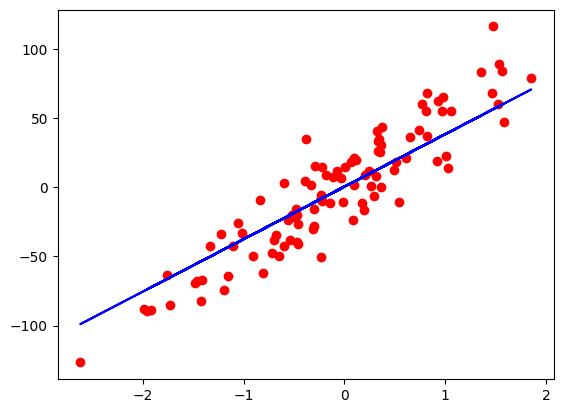

In [27]:
#plot

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()